In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn
import seaborn as sb
from sklearn.cluster import DBSCAN
from collections import Counter

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

# DBScan clustering
## to identify outliers

In [8]:
address = '../Data/iris.data.csv'
df = pd.read_csv(address, header=None, sep=',')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data = df.iloc[:, 0:4].values
target = df.iloc[:, 4].values

df[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
model = DBSCAN(eps=0.8, min_samples=19).fit(data)
print(model)

DBSCAN(eps=0.8, min_samples=19)


### Visualizing results

In [11]:
outliers_df = pd.DataFrame(data)
print(Counter(model.labels_), '\n')
print(outliers_df[model.labels_ == -1])

Counter({1: 94, 0: 50, -1: 6}) 

       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBScan for outlier detection')

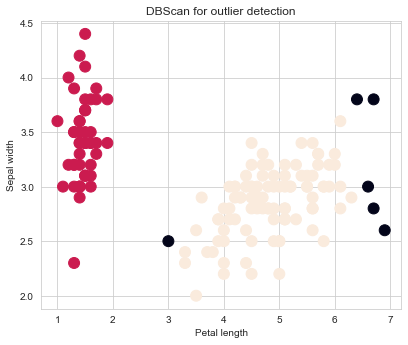

In [12]:
fig = plt.figure()
ax = fig.add_axes([.1,.1, 1, 1])
colors = model.labels_
ax.scatter(data[:,2], data[:,1], c=colors, s=120)
ax.set_xlabel('Petal length')
ax.set_ylabel('Sepal width')
plt.title('DBScan for outlier detection')

In [15]:
total_observations = Counter(model.labels_)
ttl_observations = 0
for k, v in total_observations.items():
    ttl_observations += v
    
print(f"Observations: {ttl_observations}")
print(f"Outliers:     {total_observations[-1]}")
print(f"Is < 5%:      {total_observations[-1] / ttl_observations :.2%}")

Observations: 150
Outliers:     6
Is < 5%:      4.00%
